In [1]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# [Percentile](https://www.inferentialthinking.com/chapters/13/1/Percentiles) (Inferential Thinking - 13.1)
Numerical data can be sorted in increasing or decreasing order. Hence, the values of a numerical data set possess a **rank order**. **A percentile is the value at a particular rank**.

An example: 
* If your score on a test is on the 95th percentile, this means only 5% of the scores were higher than yours. 
* The median is the 50th percentile; it is often assumed that 50% of the values in the data set above are above the median.

However, there are some special cases that require precise definition that works for all ranks and lists. An example:

* All students in the class score 75
    * Then 75 is a natural candidate for the median
    * But it's NOT true that 50% of the scores are above 75.
* Also, 75 is an equally natural candidate for the 95th percentile or the 25th or any other percentile

Thus, ties (equal data values) have to be taken into account when defining percentiles.

We also need to be careful on exactly how far up the list go when the relevant index is not clear (e.g. the 87th percentile of a collection of 10 values).

## Computing Percentile - A Numerical Example (Mix of Vid Lecture & Inferential Thinking)
We will define the 80th percentile as the value in a set/collection that's at least as large as 80% of all the values in the set.

For example:
* If `s = [1, 7, 3, 9, 5]`, then `percentile(80, s)` is 7
* The 80th percentile is ordered element 4: (80/100) * 5
    * 5 is the size of the set
* For a percentile that does not exactly correspond to an element, take the next greater element instead
    * e.g the 81th percentile is 9

Another example: Consider the sizes of the 5 largest continents - Africa, Antarctica, Asia, North America, and South America - rounded to the nearest million square miles.

In [2]:
sizes = make_array(12, 17, 6, 9, 7)

The 80th percentile is the smallest value that is as large as 80% of the elements in `sizes`. That is, the 4/5th of the 5 elements, which is 12.

In [3]:
np.sort(sizes)

array([ 6,  7,  9, 12, 17])

The 80th percentile is a value on the list, which is 12.
* 80% of the values are less or equal to it
    * It is the smallest value on the list for which this is true

The 70th percentile is the smallest value in the collection that is at least as large as 70% of the elements of `sizes`.
* However, 70% of 5 elements is 3.5
    * In this case, we round up so that the 70th percentile is the 4th element of the set. That is 12, the same as the 80th percentile.

## The Percentile Function
The `percentile` function takes 2 argument:
* A rank between 0 and 100
* An array of data set

It returns the corresponding percentile of the array

In [4]:
percentile(70, sizes)

12

## The General Definition of Percentile
Let **p** be a number between 0 to 100. The **p**th percentile of a collection is the smallest value in the collection that is at least as large as p% of all the values. By this definition, any percentile between 0 to 100 can be computed for any collection of values, and it is always an element of the collection.

Suppose there are **n** elements in the collection. To find the **p**th percentile:
* Sort the collection in increasing order
* Find **p**% of n: (p/100)
    * Call this **k**
* If **k** is:
    * An integer, take the **k**th element of the sorted collection
    * Not an integer, round up to the next integer and take that element of the sorted collection

### Example: Scores and Section
The table `scores_and_sections` contains the midterms scores for students grouped by sections.

In [5]:
scores_and_sections = Table.read_table('scores_by_section.csv')
scores_and_sections

Section,Midterm
1,22
2,12
2,23
2,14
1,20
3,25
4,19
1,24
5,8
6,14


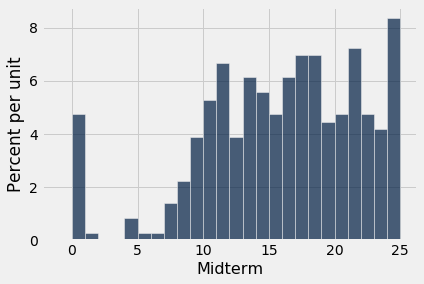

In [6]:
scores_and_sections.select('Midterm').hist(bins=np.arange(-1, 26, 1))

#### What's the 85th percentile of the scores?

In [7]:
scores = scores_and_sections.column(1)

In [8]:
percentile(85, scores)

22

According to the `percentile` function, the 85th percentile was 22. To check if this is consistent with our new definition, let's apply the definition directly. 

First, put the scores in increasing order:

In [9]:
sorted = np.sort(scores_and_sections.column(1))
sorted

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        1,  4,  4,  4,  5,  6,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,
        8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14,
       14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 18, 18

Next, calculate 85% of the length of `sorted`.

In [10]:
0.85 * len(sorted)

305.15

Above, we did not get an integer. By definition, the 85th percentile is the 306th element of `sorted`. By Python's indexing convention, this is item 305 of the `sorted` array.

In [11]:
# The 306th element of the sorted array

sorted.item(305)

22

## Quartiles
The **first quartile** of a numerical collection is the 25th percentile. The term arises from **the first quarter**.

In [12]:
percentile(25, scores)

11

The second quartile is the median.

In [13]:
percentile(50, scores)

16

The third quartile is the 75th percentile.

In [14]:
percentile(75, scores)

20

Distribution of scores are sometimes summarized by the "middle 50%" interval, between the first and third quartiles

### Discussion Question
Which are `True`, when `s = [1, 7, 3, 9, 5]`?

In [15]:
s = [1, 7, 3, 9, 5]
percentile(10, s) == 0 # Is this true?

False

In [16]:
percentile(10, s)

1

In [17]:
percentile (39, s) == percentile(40, s) # Is this true?

True

In [18]:
percentile(39, s)

3

In [19]:
percentile (40, s) == percentile(41, s) # Is this true?

False

In [20]:
percentile(41, s)

5

In [21]:
percentile(50, s) == 5 # Is this true?

True

# [Estimation] (https://www.inferentialthinking.com/chapters/13/Estimation) (Inferential Thinking - 13)
In the previous chapter we began to develop ways of inferential thinking. In particular, we learned how to use data to decide between 2 hypotheses about the world. But sometimes, **we just want to know how big something is**. For example:
* We investigated how many warplanes the enemy might have
* In an election year, we might want to know what % of voters favor a particular candidate
* To assess the current economy, we might be interested in the median annual income of households in the U.S.

In this chapter, we'll develop a way to **estimate** an unknown parameter. Recall that **a parameter is a numerical value associated with a population**.

* To figure out the value of a parameter, we need data. 
    * If we have the relevant data for the entire population, we can simply calculate the parameter. 
* But if the population is very large (e.g. all the households in the U.S.), then it might be too expensive and time consuming to gather data from the entire population
    * In such situations, data scientists rely on sampling at random from the population

**How to make justifiable conclusions about the unknown parameter, based on the data in the random sample?** We'll answer this question by using inferential thinking.

A statistic based on a random sample can be **a reasonable estimate** of an unknown parameter in the population. For example, you might want to use the **median annual income of sampled households** as an estimate of the median annual income of all households in the U.S.

## [Variability of the Estimate - Bootstrap](https://www.inferentialthinking.com/chapters/13/2/Bootstrap) (Inferential Thinking - 13.2)

The value of any statistic depends on the sample, and the sample is based on random draws. Every time data scientists come up with an estimate based on a random sample, they face the question:

**"How different could this estimate have been, if the sample had come out differently?"**.

A random sample is just one of numerous possible random samples, and thus the estimate acquired from the sample is just one of many plausible estimates. If we want to analyze how much these estimates can vary, we would need to draw another sample from the population, and compute a new estimate based on the new sample. However, **what if we don't have the resources to go back to the population and draw another sample?**.

### Employee Compensation in the City of San Francisco
[SF OpenData](https://data.sfgov.org/) is a website where the City and the county of San Francisco make some of their data publicly available. One of the data sets contains compensation data for employees of the City. These include:
* Medical professionals at City-run hospitals
* Police officers
* Transportation workers
* Elected officials
* and all other employees of the city.

In [22]:
sf2015 = Table.read_table('san_francisco_2015.csv')
sf2015

Year Type,Year,Organization Group Code,Organization Group,Department Code,Department,Union Code,Union,Job Family Code,Job Family,Job Code,Job,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health/Dental,Other Benefits,Total Benefits,Total Compensation
Calendar,2015,2,"Public Works, Transportation & Commerce",WTR,PUC Water Department,21,"Prof & Tech Engineers - Miscellaneous, Local 21",2400,"Lab, Pharmacy & Med Techs",2481,Water Qualitytech I/II,21538,82146,0,0,82146,16942.2,12340.9,6337.73,35620.8,117767
Calendar,2015,2,"Public Works, Transportation & Commerce",DPW,General Services Agency - Public Works,12,"Carpet, Linoleum and Soft Tile Workers, Local 12",7300,Journeyman Trade,7393,Soft Floor Coverer,5459,32165.8,973.19,848.96,33987.9,0,4587.51,2634.42,7221.93,41209.8
Calendar,2015,4,Community Health,DPH,Public Health,790,"SEIU - Miscellaneous, Local 1021",1600,"Payroll, Billing & Accounting",1636,Health Care Billing Clerk 2,41541,71311,5757.98,0,77069,14697.6,12424.5,6370.06,33492.2,110561
Calendar,2015,4,Community Health,DPH,Public Health,351,Municipal Executive Association - Miscellaneous,0900,Management,2620,Food Service Mgr Administrator,26718,28430.2,0,763.07,29193.3,0,4223.14,5208.51,9431.65,38625
Calendar,2015,2,"Public Works, Transportation & Commerce",MTA,Municipal Transportation Agency,790,"SEIU - Miscellaneous, Local 1021",8200,Protection & Apprehension,8201,School Crossing Guard,45810,7948.75,0,0,7948.75,0,2873.17,616.24,3489.41,11438.2
Calendar,2015,1,Public Protection,POL,Police,911,Police Officers' Association,Q000,Police Services,Q002,Police Officer,32906,2235,0,0,2235,490.36,286.72,176.57,953.65,3188.65
Calendar,2015,4,Community Health,DPH,Public Health,791,"SEIU - Staff and Per Diem Nurses, Local 1021",2300,Nursing,2328,Nurse Practitioner,7506,187247,0,11704.1,198951,37683.7,12424.5,11221.7,61329.9,260281
Calendar,2015,2,"Public Works, Transportation & Commerce",MTA,Municipal Transportation Agency,253,"Transport Workers - Transit Operators, Local 250-A",9100,Street Transit,9163,Transit Operator,36773,66988.5,3512.88,2770.39,73271.8,19127.2,13203,5455.1,37785.3,111057
Calendar,2015,6,General Administration & Finance,CAT,City Attorney,311,Municipal Attorneys' Association,8100,Legal & Court,8177,Attorney (Civil/Criminal),12963,135190,0,1562.5,136752,27501.8,12424.5,10103,50029.3,186781
Calendar,2015,3,Human Welfare & Neighborhood Development,DSS,Human Services,535,"SEIU - Human Services, Local 1021",9700,Community Development,9703,Emp & Training Spec 2,35179,70474.8,147.28,1647.24,72269.3,14650.3,10696.9,5993.11,31340.3,103610


We're going to analyze the final column, `Total Compensation`. That's the employee's salary plus the City's contribution towards his/her retirement and benefit plans.

Financial packages in a calendar year can be difficult to understand since they depend on:
* Date of hire
* Whether the employee is changing jobs within the City
* and other factors

For example, the lowest value in the `Total Compensation` column look a little strange.

In [23]:
sf2015.sort('Total Compensation')

Year Type,Year,Organization Group Code,Organization Group,Department Code,Department,Union Code,Union,Job Family Code,Job Family,Job Code,Job,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health/Dental,Other Benefits,Total Benefits,Total Compensation
Calendar,2015,1,Public Protection,FIR,Fire Department,798,"Firefighters - Miscellaneous, Local 798",H000,Fire Services,H002,Firefighter,43833,0,0,0,0,0,0,-423.76,-423.76,-423.76
Calendar,2015,4,Community Health,DPH,Public Health,790,"SEIU - Miscellaneous, Local 1021",9900,Public Service Aide,9924,PS Aide Health Services,27871,-292.4,0,0,-292.4,0,-95.58,-22.63,-118.21,-410.61
Calendar,2015,1,Public Protection,JUV,Juvenile Probation,790,"SEIU - Miscellaneous, Local 1021",8300,Correction & Detention,8320,"Counselor, Juvenile Hall",10517,0,0,0,0,0,0,-159.12,-159.12,-159.12
Calendar,2015,6,General Administration & Finance,CPC,City Planning,21,"Prof & Tech Engineers - Miscellaneous, Local 21",1000,Information Systems,1053,IS Business Analyst-Senior,18961,0,0,0,0,0,0,-26.53,-26.53,-26.53
Calendar,2015,6,General Administration & Finance,CPC,City Planning,21,"Prof & Tech Engineers - Miscellaneous, Local 21",5200,Professional Engineering,5277,Planner 1,19387,0,0,0,0,0,0,-9.51,-9.51,-9.51
Calendar,2015,2,"Public Works, Transportation & Commerce",PUC,PUC Public Utilities Commission,21,"Prof & Tech Engineers - Miscellaneous, Local 21",1000,Information Systems,1044,IS Engineer-Principal,28988,0,0,0,0,0,0,-3.1,-3.1,-3.1
Calendar,2015,1,Public Protection,JUV,Juvenile Probation,39,"Stationary Engineers, Local 39",7300,Journeyman Trade,7335,Senior Stationary Engineer,19125,0,0,0,0,0,0,-0.01,-0.01,-0.01
Calendar,2015,1,Public Protection,ECD,Department of Emergency Management,351,Municipal Executive Association - Miscellaneous,0900,Management,0922,Manager I,30025,0,0,0,0,0,0,0,0,0
Calendar,2015,7,General City Responsibilities,UNA,General Fund Unallocated,790,"SEIU - Miscellaneous, Local 1021",3200,Recreation,3280,Assistant Recreation Director,49784,0,0,0,0,0,0,1.27,1.27,1.27
Calendar,2015,4,Community Health,DPH,Public Health,250,"SEIU - Health Workers, Local 1021",2600,Dietary & Food,2654,Cook,26768,0,0,2.21,2.21,0,0,0.17,0.17,2.38


For clarity of comparison, we'll focus our attention on those who had at least the equivalent of a half-time job for the whole year. At a minimum wage of about 10/hr, and 20 hrs/week for 52 weeks, that's a salary of about $10,000.

In [24]:
sf2015 = sf2015.where('Salaries', are.above(10000))
sf2015.num_rows

36569

## Population and Parameter
Let the table above (those who have salary more than $10,000) be the population. Here's a histogram of the total compensations.

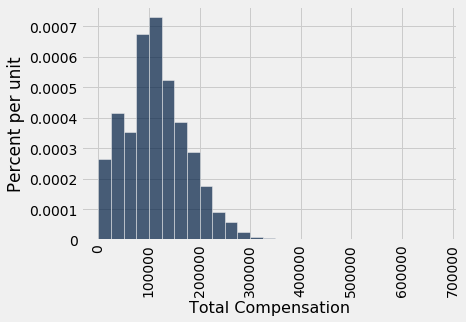

In [25]:
sf_bins = np.arange(0, 700000, 25000)
sf2015.select('Total Compensation').hist(bins=sf_bins)

Few of them are greater than 300K. For example, the total compensation of the Chief Investment Officer was almost 650K. This is why the horizontal axis stretches to 700K.

In [26]:
sf2015.sort('Total Compensation', descending=True).show(2)

Year Type,Year,Organization Group Code,Organization Group,Department Code,Department,Union Code,Union,Job Family Code,Job Family,Job Code,Job,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health/Dental,Other Benefits,Total Benefits,Total Compensation
Calendar,2015,6,General Administration & Finance,RET,Retirement System,351,Municipal Executive Association - Miscellaneous,1100,Administrative & Mgmt (Unrep),1119,Chief Investment Officer,46881,507832,0,0,507832,105053,12424.5,23566.2,141044,648875
Calendar,2015,6,General Administration & Finance,ADM,General Services Agency - City Admin,164,Physicians and Dentists - Miscellaneous,2500,Med Therapy & Auxiliary,2598,Asst Med Examiner,1016,279311,3829.36,114434,397574,56211.6,12424.5,14299.1,82935.2,480509


Now let the parameter be the **median** of the total compensations.

In [27]:
pop_median = percentile(50, sf2015.column('Total Compensation'))
pop_median

110305.79

From a practical perspective, there's no reason for us to draw a sample to estimate this parameter since we know its value. However, we will pretend that we don't know the value and see how well we can estimate based on a random sample.

### A Random Sample and an Estimate
Let's draw a sample of 500 employees at random **without replacement**, and let the parameter be **the median total compensation of the sampled employees**.

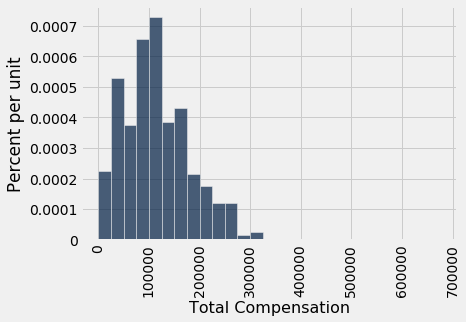

In [28]:
our_sample = sf2015.sample(500, with_replacement=False)
our_sample.select('Total Compensation').hist(bins=sf_bins)

In [29]:
est_median = percentile(50, our_sample.column('Total Compensation'))
est_median

108635.84

Recall the **law of averages** states that as the sample size gets larger, the distribution of the sample resembles that of the population, and consequently the sample median is not far off from the population median.

Now we have one estimate of the parameter. However, had the sample come out differently, the estimate would have been different. We want to quantify the range of variability of this estimate. 

To see how different the estimate would be if the sample had come out differently, we could just draw another sample from the population, but that would be cheating. Here we are trying to mimic real life, in which we don't have the resources to access all the population data. We would have to get another random sample **without sampling from the population**.

# The Bootstrap: Resampling from the Sample
We have a large random sample from the population. As we know, a large random sample is likely to resemble the population. This observation allows data scientists to **lift themselves up by their own bootstraps**: the sampling procedure can be replicated by **sampling from the sample**.

The steps of the bootstrap method for generating another random sample that resembles the population are as the following:
* Treat the original sample as if it were the population
* Draw from the sample at random
    * **With replacement**
    * The same number of times as the original sample size
    
It's important to resample the same number of times as the original sample size because the variability of an estimate depends on the size of the sample. Since our original sample consisted of 500 employees, our sample median was based on 500 values. To see how different the sample could have been, we have to compare it to the median of other samples of size 500.

If we drew 500 times at random **without replacement** from our sample of size 500, we would just get the same sample back. By drawing **with replacement**, we create the possibility for the new samples to be different from the original  as some employees might be drawn more than once and others not at all.

#### Why is this a good idea?
By law of averages, the distribution of the **original sample** is likely to resemble the **population**.
* The distribution of the **resamples** are likely to resemble the original sample
* Thus, the distributions of the **resamples** are likely to resemble the **population** as well.
<img src = "bootstrap.jpg" width = 600/>

## Resampled Median
Recall that when the `sample` method is used without specifying a sample size, by default the **sample size is the number of rows of the table from which the sample is drawn**. This is perfect for bootstrap! Below is one sample drawn from the original sample and the corresponding sample median.

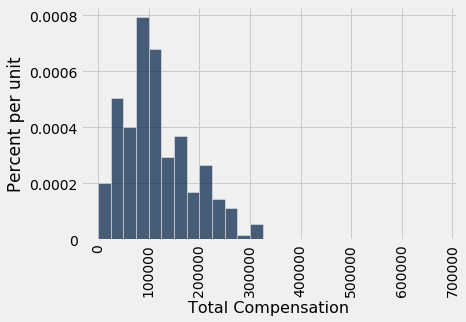

In [30]:
resample_1 = our_sample.sample()
resample_1.select('Total Compensation').hist(bins=sf_bins)

In [31]:
resampled_median_1 = percentile(50, resample_1.column('Total Compensation'))
resampled_median_1

105723.64

By resampling, we have another estimate of the population median. By resampling multiple times, we get many estimates that an empirical distribution of estimates can be constructed.

In [32]:
resample_2 = our_sample.sample()
resampled_median_2 = percentile(50, resample_2.column('Total Compensation'))
resampled_median_2

107507.51

### Bootstrap Empirical Distribution of the Sample Median
Here we define a function `bootstrap_median` that takes:
* The original sample
* The label of the column containing the variable
* The number of bootstrap samples we want to make

and returns an array of resampled medians.

Each time we resample and find the median, we **replicate** the bootstrap process. 

In [33]:
def bootstrap_median(original, label, repetitions):
    """Returns an array of bootstrapped sample medians.
    original: table containing the original sample
    label: label of column containing the variable
    repetitions: number of bootstrap samples
    """
    selected_column = original.select(label)
    medians = make_array()
    for i in np.arange(repetitions):
        bootstrap_sample = selected_column.sample()
        resampled_median = percentile(50, bootstrap_sample.column(0))
        medians = np.append(medians, resampled_median)
        
    return medians

We'll try to replicate the bootstrap process 5000 times. The array `bstrap_medians` contains all the medians of all 5,000 bootstrap samples. 

In [34]:
bstrap_medians = bootstrap_median(our_sample, 'Total Compensation', 5000)

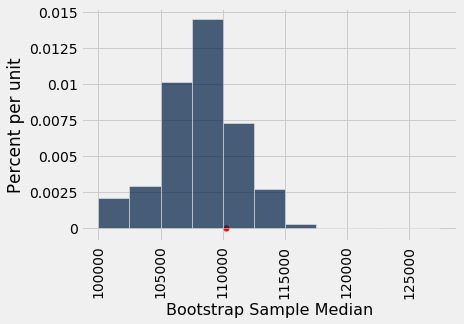

In [35]:
resampled_medians = Table().with_column('Bootstrap Sample Median', bstrap_medians)

median_bins=np.arange(100000, 130000, 2500)
resampled_medians.hist(bins = median_bins)
plt.scatter(pop_median, 0, color='red', s=30);

The red dot is the population median. The empirical histogram is the result of random draws.

Remember also that the point of all these computations is **to estimate the population median, which is the red dot**. Our estimates are all the randomly generated sampled medians whose histogram we see above. We want those estimates to contain the parameter – it they don’t, then they are off.

### Do the Estimates Capture the Parameter?
How often does the empirical histogram of the resampled medians sit firmly over the red dot, and not just brush the dot with its tails? To answer this, we must define “sit firmly”. Let’s define that to be “the middle 95% of the resampled medians contains the red dot”.

In [36]:
# Left end of the middle 95% interval
left = percentile(2.5, bstrap_medians)
left

100891.99

In [37]:
# Right end of the middle 95% interval
right = percentile(97.5, bstrap_medians)
right

114147.78

The interval and the population median are shown on the histogram below.

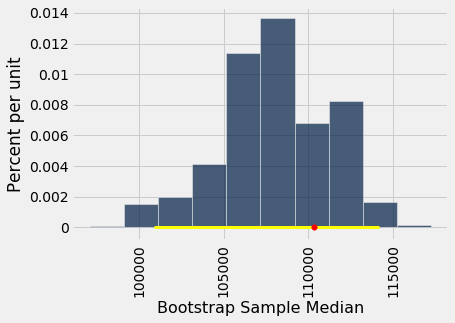

In [38]:
#median_bins=np.arange(100000, 130000, 2500)
#resampled_medians.hist(bins = median_bins)
resampled_medians.hist()

plt.plot(make_array(left, right), make_array(0, 0), color='yellow', lw=3, zorder=1)
plt.scatter(pop_median, 0, color='red', s=30, zorder=2);

Above, we see that the **middle 95%** interval of estimates captured the parameter. However, was that a fluke?

To analyze how frequent the interval contains the parameter, we need to run the entire process multiple times. We'll repeat the following 100 times:

* Draw an original sample of size 500 from the population
* Take 5,000 replications of the bootstrap process
* Generate the **middle 95%** interval of resampled medians

We'll end up with 100 intervals, and count how many of them contain the population median.

In [39]:
left_ends = make_array()
right_ends = make_array()

total_compensation = sf2015.select('Total Compensation')

for i in np.arange(100):
    first_sample = total_compensation.sample(500, with_replacement = False)
    medians = bootstrap_median(first_sample, 'Total Compensation', 5000)
    left_ends = np.append(left_ends, percentile(2.5, medians))
    right_ends = np.append(right_ends, percentile(97.5, medians))
    
intervals = Table().with_columns(
    'Left', left_ends,
'Right', right_ends
)

In [40]:
intervals

Left,Right
100834,113829
99650.5,112160
103746,117833
106407,116398
104049,116924
104321,115490
105751,118111
100234,115509
107164,115323
100178,113965


The good intervals are those that contain the parameter we're trying to estimate. Usually the parameter is unknown, but in this case we know what the parameter is.

In [41]:
pop_median

110305.79

How many of the 100 intervals contain the population median? These are the intervals where:
* The left end is below the population median
* The right end is above the population median

In [42]:
intervals.where('Left', are.below(pop_median)).where('Right', are.above(pop_median)).num_rows

96

Text(0.5, 1.0, 'Population Median and Intervals of Estimates')

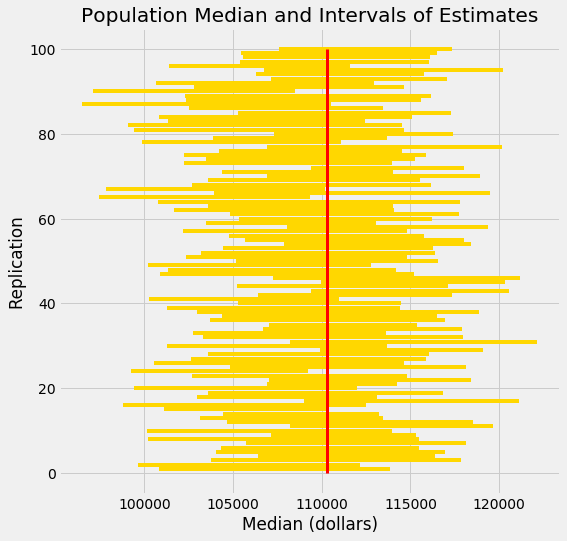

In [52]:
replication_number = np.ndarray.astype(np.arange(1, 101), str)
intervals2 = Table(replication_number).with_rows(make_array(left_ends, right_ends))

plt.figure(figsize = (8,8))
for i in np.arange(100):
    ends = intervals2.column(i)
    plt.plot(ends, make_array(i+1, i+1), color = 'gold')
    
plt.plot(make_array(pop_median, pop_median), make_array(0, 100), color = 'red', lw = 3)
plt.xlabel('Median (dollars)')
plt.ylabel('Replication')
plt.title('Population Median and Intervals of Estimates')

It's difficult to show all the intervals on horizontal axis since they have large overlaps. Thus, above is the a graph of the intervals stacked vertically. 

* The vertical axis is the number of replication from which the interval was generated
* The red line is where the parameter is. Good interval covers the parameter
    * If an interval doesn't cover the parameter, it's a dud
    
To summarize what the simulation shows, suppose we're estimating the population median by the following process:
* Draw a large random sample from the population
* Bootstrap random sample and get an estimate from the new random sample
* Repeat the step above thousands times, get thousands of estimates
* Pick off the **middle 95%** interval of all the estimates

The steps above would give one interval of estimates. If we **repeat the entire process 100 times**, we'll end up with 100 intervals. About 95 out of those 100 intervals will contain the population parameter. In other words, **this process of estimation captures the parameter about 95% of the time**. 

We can replace 95% by a different value as long as it's not 100%. Suppose we replace 95% with 80% and keep the sample size 500. The intervals of estimates will become shorter because the **middle 80%** is a smaller range than the **middle 95%**. Only about 80% of the intervals will contain the parameter.

## Aside: Lists and Append (Video Lecture)

In [43]:
a = make_array(2, 3, 4)

In [44]:
np.append(a, 5)

array([2, 3, 4, 5])

In [45]:
#Notice that a is unchanged even after the append!
a

array([2, 3, 4])

In [46]:
# b is a list, not an array!
b = [2, 3, 4]
b

[2, 3, 4]

In [47]:
# b also has append method, but it doesn't create a new list.
# Instead, it changes the original list
b.append(5)

In [48]:
b

[2, 3, 4, 5]